<a id="0"></a> <br>
 # Table of Contents  
1. [Which one is better plan?](#1)     
    1. [Initialization](#7)     
    1. [Load data](#9)     
    1. [Prepare the data](#10)     
    1. [Plans](#11) 
    1. [Fix data](#11)
1. [Enrich data](#11)
1. [Users](#11)
    1. [Fix data](#11)
    1. [Enrich data](#11)
1. [Calls](#11)
    1. [Fix data](#11)
    1. [Enrich data](#11)
1. [Messages](#11)
    1. [Fix data](#11)
    1. [Enrich data](#11)
1. [Internet](#11)
    1. [Fix data](#11)
    1. [Enrich data](#11)   
1. [Study plan conditions](#11)
1. [Aggregate data per user](#11)
1. [Study user behaviour](#11)   
1. [Calls](#11)
1. [Messages](#11)
1. [Internet](#11)
1. [Revenue](#11)
1. [Test statistical hypothesis](#11)
1. [General conclusion](#11) 
        
        
  

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [151]:
# Loading all the libraries

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy import stats

## Load data

In [152]:
# Load the data files into different DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv') 
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

## Plans

In [153]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [154]:
# Print a sample of data for plans

plans.head(15)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Fix data

--No issue--

## Enrich data

In [155]:
plans.info()

# Sample DataFrame with 'plan_name' column
data = {'plan_name': ['surf', 'ultimate']}
df = pd.DataFrame(data)

# Define the mapping of plan names to numerical values
plan_mapping = {'surf': 1, 'ultimate': 2}

# Create a new column 'plan_category' with numerical values
df['plan_category'] = df['plan_name'].map(plan_mapping)

# Print the DataFrame with the new 'plan_category' column
print(df)

# Define the mapping of plan names to numerical values
plan_mapping = {'surf': 1, 'ultimate': 2}

# Add the 'plan_category' column to the 'plans' DataFrame using the map function
plans['plan_category'] = plans['plan_name'].map(plan_mapping)

# Print the updated 'plans' DataFrame
plans.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
  plan_name  plan_category
0      surf              1
1  ultimate              2


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_category
0,50,15360,500,20,10,0.03,0.03,surf,1
1,1000,30720,3000,70,7,0.01,0.01,ultimate,2


## Users

In [156]:
# Print the general/summary information about the users' DataFrame

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [157]:
# Print a sample of data for users

users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Fix Data

In [158]:
users.duplicated().sum()

0

In [159]:
users['churn_date'] = users['churn_date'].fillna('N/A')

### Enrich Data

In [160]:
# Convert the 'reg_date' column to a datetime data type if it's not already
users['reg_date'] = pd.to_datetime(users['reg_date'])

# Create separate columns for day, month, and year
users['reg_day'] = users['reg_date'].dt.day
users['reg_month'] = users['reg_date'].dt.month
users['reg_year'] = users['reg_date'].dt.year

In [161]:
# Merge 'users' with 'plans' based on 'plan_name'
users = pd.merge(users, plans[['plan_name', 'plan_category']], left_on="plan", right_on="plan_name", how='left')

# Drop the redundant 'plan_name' column
users.drop(columns=['plan_name'], inplace=True)

# Print the updated DataFrame
display(users.head(5))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_day,reg_month,reg_year,plan_category
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,N/A,24,12,2018,2
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,N/A,13,8,2018,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,N/A,21,10,2018,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,N/A,28,1,2018,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,N/A,23,5,2018,1


## Calls

In [162]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [163]:
# Print a sample of data for calls

calls.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Fix data

In [164]:
calls.duplicated().sum()

0

In [165]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [166]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


### Enrich data

In [167]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [168]:
# Create separate columns for day, month, and year
calls['call_day'] = calls['call_date'].dt.day
calls['call_month'] = calls['call_date'].dt.month
calls['call_year'] = calls['call_date'].dt.year

In [169]:
# Sort the DataFrame by 'call_date' in descending order
calls = calls.sort_values(by='call_date', ascending=False)

# Reset the index after sorting
calls = calls.reset_index(drop=True)

In [170]:
calls.head(5)

,id,user_id,call_date,duration,call_day,call_month,call_year
0,1024_4,1024,2018-12-31,3.14,31,12,2018
1,1100_64,1100,2018-12-31,7.95,31,12,2018
2,1005_30,1005,2018-12-31,10.54,31,12,2018
3,1329_1001,1329,2018-12-31,5.23,31,12,2018
4,1329_902,1329,2018-12-31,3.55,31,12,2018


## Messages

In [171]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [172]:
# Print a sample of data for messages

messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Fix data

In [173]:
messages.duplicated().sum()

0

In [174]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [175]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

In [176]:
# Create separate columns for day, month, and year
messages['messages_day'] = messages['message_date'].dt.day
messages['messages_month'] = messages['message_date'].dt.month
messages['messages_year'] = messages['message_date'].dt.year

In [177]:
# Sort the DataFrame by 'call_date' in descending order
messages = messages.sort_values(by='message_date', ascending=False)

# Reset the index after sorting
messages = messages.reset_index(drop=True)

In [178]:
messages.head(5)

,id,user_id,message_date,messages_day,messages_month,messages_year
0,1087_54,1087,2018-12-31,31,12,2018
1,1098_119,1098,2018-12-31,31,12,2018
2,1016_187,1016,2018-12-31,31,12,2018
3,1260_19,1260,2018-12-31,31,12,2018
4,1098_290,1098,2018-12-31,31,12,2018


## Internet

In [179]:
# Print the general/summary information about the internet DataFrame

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [180]:
# Print a sample of data for the internet traffic

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Fix data

In [181]:
internet.duplicated().sum()

0

In [182]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [183]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [184]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


### Enrich data

In [185]:
# Create separate columns for day, month, and year
internet['session_day'] = internet['session_date'].dt.day
internet['session_month'] = internet['session_date'].dt.month
internet['session_year'] = internet['session_date'].dt.year

In [186]:
# Sort the DataFrame by 'call_date' in descending order
internet = internet.sort_values(by='session_date', ascending=False)

# Reset the index after sorting
internet = internet.reset_index(drop=True)

In [187]:
internet.head(5)

,id,user_id,session_date,mb_used,session_day,session_month,session_year
0,1037_15,1037,2018-12-31,264.06,31,12,2018
1,1182_558,1182,2018-12-31,1014.76,31,12,2018
2,1416_140,1416,2018-12-31,239.44,31,12,2018
3,1189_190,1189,2018-12-31,742.51,31,12,2018
4,1189_67,1189,2018-12-31,493.45,31,12,2018


## Study plan conditions

In [188]:
# Print out the plan conditions and make sure they are clear for you
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_category
0,50,15360,500,20,10,0.03,0.03,surf,1
1,1000,30720,3000,70,7,0.01,0.01,ultimate,2


## Aggregate data per user


In [189]:

# Calculate the number of calls made by each user per month. Save the result.
calls_grouped = (
    calls
    .groupby(["user_id", calls['call_date'].dt.month.rename('month')])
    .agg({"duration": ["count", "sum"]})
    .droplevel(0, axis=1)
    .reset_index()
)

# Rename columns for clarity
calls_grouped.rename(columns={"count": "number_of_calls", "sum": "total_duration"}, inplace=True)

# Round up the total call duration using np.ceil
calls_grouped['total_duration'] = np.ceil(calls_grouped['total_duration']).astype(int)

# Rename the 'duration' column to 'call_count' (if necessary)
calls_grouped = calls_grouped.rename(columns={'duration': 'call_count'})

# Display the modified DataFrame
display(calls_grouped.head())


,user_id,month,number_of_calls,total_duration
0,1000,12,16,117
1,1001,8,27,172
2,1001,9,49,298
3,1001,10,65,375
4,1001,11,64,405


In [191]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# Group by 'user_id' and the month of 'call_date', then sum the 'duration' column
minutes_spent_grouped = calls.groupby(['user_id', calls['call_date'].dt.month.rename('month')])['duration'].sum().reset_index()

calls_grouped.rename(columns={"count": "number_of_calls", "sum": "total_duration"}, inplace=True)


# Rename the 'duration' column to 'minutes_spent'
minutes_spent_grouped = minutes_spent_grouped.rename(columns={'duration': 'minutes_spent'})
display(minutes_spent_grouped.head())

,user_id,month,minutes_spent
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [192]:
# Calculate the number of messages sent by each user per month. Save the result.

messages_sent_grouped = messages.groupby(['user_id', messages['message_date'].dt.month.rename('month')])['id'].count().reset_index()

# Rename the 'id' column to 'message_count'
messages_sent_grouped = messages_sent_grouped.rename(columns={'id': 'message_count'})
display(messages_sent_grouped.head())


,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [193]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_traffic_grouped = internet.groupby(['user_id', internet['session_date'].dt.month.rename('month')])['mb_used'].sum().reset_index()

# Rename the 'mb_used' column to 'mb_used_total'
internet_traffic_grouped = internet_traffic_grouped.rename(columns={'mb_used': 'mb_used_total'})
display(internet_traffic_grouped.head())

,user_id,month,mb_used_total
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [194]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# Merge calls data with minutes spent data
merged_data = pd.merge(calls_grouped, minutes_spent_grouped, on=['user_id', 'month'], how='outer')

# Merge merged_data with messages sent data
merged_data = pd.merge(merged_data, messages_sent_grouped, on=['user_id', 'month'], how='outer')

# Merge merged_data with internet traffic data
merged_data = pd.merge(merged_data, internet_traffic_grouped, on=['user_id', 'month'], how='outer')

# If you want to fill NaN values with 0 for missing data
merged_data = merged_data.fillna(0)
display(merged_data.head())

,user_id,month,number_of_calls,total_duration,minutes_spent,message_count,mb_used_total
0,1000,12,16.0,117.0,116.83,11.0,1901.47
1,1001,8,27.0,172.0,171.14,30.0,6919.15
2,1001,9,49.0,298.0,297.69,44.0,13314.82
3,1001,10,65.0,375.0,374.11,53.0,22330.49
4,1001,11,64.0,405.0,404.59,36.0,18504.30


In [195]:
print(merged_data.columns)
print(plans.columns)
print(users.columns)
print(plans.columns)
print(calls.columns)

Index(['user_id', 'month', 'number_of_calls', 'total_duration',
       'minutes_spent', 'message_count', 'mb_used_total'],
      dtype='object')
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'plan_category'],
      dtype='object')
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'reg_day', 'reg_month', 'reg_year', 'plan_category'],
      dtype='object')
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'plan_category'],
      dtype='object')
Index(['id', 'user_id', 'call_date', 'duration', 'call_day', 'call_month',
       'call_year'],
      dtype='object')


In [196]:
# Add the plan information
# Merge 'merged_data' with 'plans' based on 'plan_name'
merged_data_with_user_info = pd.merge(merged_data, users[['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan']], on='user_id', how='left')

# Merge 'merged_data_with_user_info' with 'plans' based on 'plan_name'
merged_data_with_user_info = pd.merge(merged_data_with_user_info, plans[['plan_name', 'plan_category']], left_on="plan", right_on="plan_name", how='left')

# Drop the redundant 'plan_name' column
merged_data_with_user_info.drop(columns=['plan_name'], inplace=True)

# Print the updated DataFrame
display(merged_data_with_user_info)

# Check the columns
print(merged_data_with_user_info.columns)


,user_id,month,number_of_calls,total_duration,minutes_spent,message_count,mb_used_total,first_name,last_name,age,city,reg_date,plan,plan_category
0,1000,12,16.0,117.0,116.83,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2
1,1001,8,27.0,172.0,171.14,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1
2,1001,9,49.0,298.0,297.69,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1
3,1001,10,65.0,375.0,374.11,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1
4,1001,11,64.0,405.0,404.59,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,0.00,61.0,13039.91,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,1
2289,1361,5,0.0,0.0,0.00,2.0,1519.69,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,1
2290,1482,10,0.0,0.0,0.00,2.0,0.00,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,2
2291,1108,12,0.0,0.0,0.00,0.0,233.17,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,2


Index(['user_id', 'month', 'number_of_calls', 'total_duration',
       'minutes_spent', 'message_count', 'mb_used_total', 'first_name',
       'last_name', 'age', 'city', 'reg_date', 'plan', 'plan_category'],
      dtype='object')


In [197]:


# Create a DataFrame with the plan details, including plan_category
plans = pd.DataFrame({
    'messages_included': [50, 1000],
    'mb_per_month_included': [15360, 30720],
    'minutes_included': [500, 3000],
    'usd_monthly_pay': [20, 70],
    'usd_per_gb': [10, 7],
    'usd_per_message': [0.03, 0.01],
    'usd_per_minute': [0.03, 0.01],
    'plan_name': ['surf', 'ultimate'],
    'plan_category': [1, 2]  
})


# Merge the data for calculations
merged_data_with_user_info = merged_data.merge(users[['user_id', 'plan']], on='user_id', how='left')
merged_data_with_user_info = merged_data_with_user_info.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Calculate additional charges for calls, messages, and internet usage
merged_data_with_user_info['call_revenue'] = (
    (merged_data_with_user_info['minutes_spent'] - merged_data_with_user_info['minutes_included']) *
    merged_data_with_user_info['usd_per_minute']
).clip(lower=0)  # Ensure charges are non-negative

merged_data_with_user_info['message_revenue'] = (
    (merged_data_with_user_info['message_count'] - merged_data_with_user_info['messages_included']) *
    merged_data_with_user_info['usd_per_message']
).clip(lower=0)

merged_data_with_user_info['internet_revenue'] = (
    ((merged_data_with_user_info['mb_used_total'] / 1024) - (merged_data_with_user_info['mb_per_month_included'] / 1024)) *
    merged_data_with_user_info['usd_per_gb']
).clip(lower=0)

# Calculate the total monthly revenue for each user
merged_data_with_user_info['total_revenue'] = (
    merged_data_with_user_info['call_revenue'] +
    merged_data_with_user_info['message_revenue'] +
    merged_data_with_user_info['internet_revenue'] +
    merged_data_with_user_info['usd_monthly_pay']
)

# Fill NaN values in 'total_revenue' with 0
merged_data_with_user_info['total_revenue'].fillna(0, inplace=True)

# Group by user_id and sum the total revenue for each user
user_monthly_revenue = merged_data_with_user_info.groupby('user_id', as_index=False)['total_revenue'].sum()

# Merge user-specific information and plan_name into the result DataFrame
user_monthly_revenue = user_monthly_revenue.merge(users[['user_id', 'first_name', 'last_name', 'age', 'city']], on='user_id', how='left')
user_monthly_revenue['plan_name'] = merged_data_with_user_info['plan_name']  # Add the 'plan_name' column

# Merge user_monthly_revenue with plans to add plan_name and plan_category
user_monthly_revenue = user_monthly_revenue.merge(plans[['plan_name', 'plan_category']], left_on='plan_name', right_on='plan_name', how='left')

# Round 'total_revenue' to two decimal places
user_monthly_revenue['total_revenue'] = user_monthly_revenue['total_revenue'].round(2)

# Print or analyze the user_monthly_revenue DataFrame as needed
display(user_monthly_revenue.head(12))


,user_id,total_revenue,first_name,last_name,age,city,plan_name,plan_category
0,1000,70.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,2
1,1001,238.02,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
2,1002,98.92,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,1
3,1003,150.33,Reynaldo,Jenkins,52,"Tulsa, OK MSA",surf,1
4,1004,580.94,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
5,1005,37.38,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",surf,1
6,1006,149.56,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",surf,1
7,1007,760.81,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",surf,1
8,1008,210.00,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",surf,1
9,1009,836.22,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,1


In [198]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_day,reg_month,reg_year,plan_category
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,N/A,24,12,2018,2
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,N/A,13,8,2018,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,N/A,21,10,2018,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,N/A,28,1,2018,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,N/A,23,5,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,N/A,4,9,2018,1
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,N/A,20,2,2018,1
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,N/A,10,12,2018,2
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,N/A,4,2,2018,1


In [199]:
merged_data

,user_id,month,number_of_calls,total_duration,minutes_spent,message_count,mb_used_total
0,1000,12,16.0,117.0,116.83,11.0,1901.47
1,1001,8,27.0,172.0,171.14,30.0,6919.15
2,1001,9,49.0,298.0,297.69,44.0,13314.82
3,1001,10,65.0,375.0,374.11,53.0,22330.49
4,1001,11,64.0,405.0,404.59,36.0,18504.30
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,0.00,61.0,13039.91
2289,1361,5,0.0,0.0,0.00,2.0,1519.69
2290,1482,10,0.0,0.0,0.00,2.0,0.00
2291,1108,12,0.0,0.0,0.00,0.0,233.17


In [200]:
# Check if the 'plan' and 'plan_category' columns exist in the 'users' DataFrame
print(users.columns)

# Merge 'users' with 'merged_data' based on 'user_id'
merged_data = pd.merge(merged_data, users[['user_id', 'plan', 'plan_category']], on='user_id', how='left')

# Print the updated DataFrame
display(merged_data.head())


Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'reg_day', 'reg_month', 'reg_year', 'plan_category'],
      dtype='object')


,user_id,month,number_of_calls,total_duration,minutes_spent,message_count,mb_used_total,plan,plan_category
0,1000,12,16.0,117.0,116.83,11.0,1901.47,ultimate,2
1,1001,8,27.0,172.0,171.14,30.0,6919.15,surf,1
2,1001,9,49.0,298.0,297.69,44.0,13314.82,surf,1
3,1001,10,65.0,375.0,374.11,53.0,22330.49,surf,1
4,1001,11,64.0,405.0,404.59,36.0,18504.30,surf,1


## Study user behaviour

In [201]:
print(merged_data.columns)

## Study user behaviour

Index(['user_id', 'month', 'number_of_calls', 'total_duration',
       'minutes_spent', 'message_count', 'mb_used_total', 'plan',
       'plan_category'],
      dtype='object')


### Calls

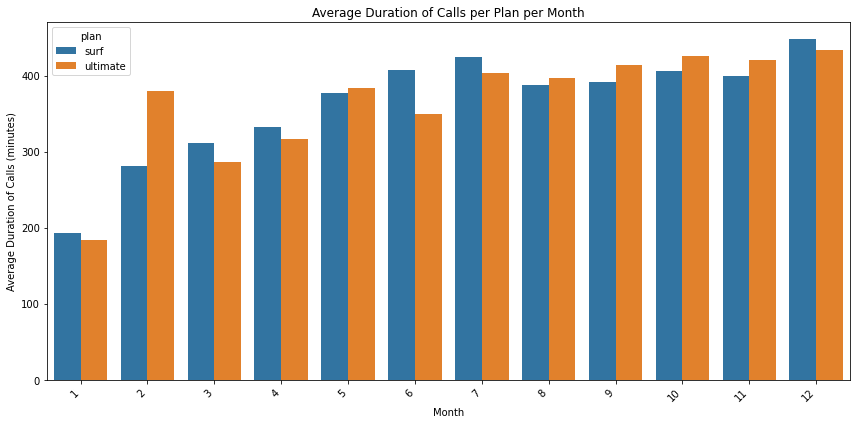

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,12.0,363.062967,71.953604,192.8400,327.027500,389.080846,406.071489,447.475283
ultimate,12.0,365.974762,73.046062,183.1625,341.485322,390.469808,415.084884,433.012583


In [202]:

# Assuming you have 'merged_data' DataFrame with columns 'plan', 'month', and 'minutes_spent'

# Group the data by 'plan' and 'month' and calculate the average duration
average_duration_per_month = merged_data.groupby(['plan', 'month'])['minutes_spent'].mean().reset_index()

# Create a bar plot to compare average duration of calls per plan per month
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=average_duration_per_month,
    x='month',
    y='minutes_spent',
    hue='plan',
)
plt.xlabel('Month')
plt.ylabel('Average Duration of Calls (minutes)')
plt.title('Average Duration of Calls per Plan per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Calculate summary statistics
summary_statistics = average_duration_per_month.groupby('plan')['minutes_spent'].describe()

display(summary_statistics)


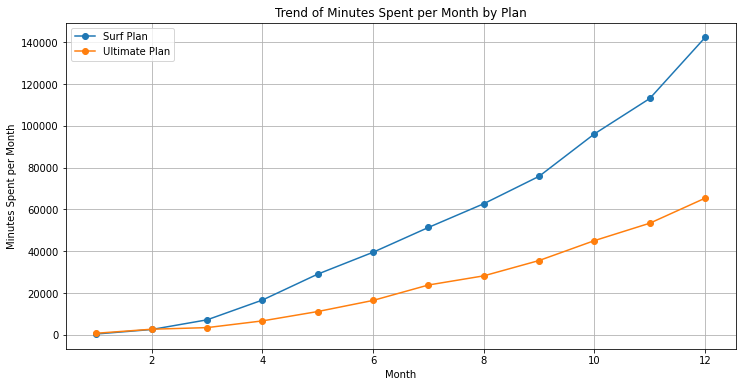

'Surf Plan Summary Statistics:'

count        12.000000
mean      53057.603333
std       46283.319748
min         385.680000
25%       14252.327500
50%       45433.285000
75%       80926.617500
max      142297.140000
Name: minutes_spent, dtype: float64

'Ultimate Plan Summary Statistics:'

count       12.000000
mean     24371.585000
std      21562.316088
min        732.650000
25%       5842.107500
50%      20131.695000
75%      37923.985000
max      65384.900000
Name: minutes_spent, dtype: float64

In [203]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.


# Group the data by 'plan' and 'month' and calculate the total minutes spent per user per month
minutes_per_month = merged_data.groupby(['plan', 'month'])['minutes_spent'].sum().reset_index()

# Separate the data for each plan
surf_minutes = minutes_per_month[minutes_per_month['plan'] == 'surf']['minutes_spent']
ultimate_minutes = minutes_per_month[minutes_per_month['plan'] == 'ultimate']['minutes_spent']

plt.figure(figsize=(12, 6))
for plan in ['surf', 'ultimate']:
    plan_data = minutes_per_month[minutes_per_month['plan'] == plan]
    plt.plot(plan_data['month'], plan_data['minutes_spent'], label=f'{plan.capitalize()} Plan', marker='o')

plt.xlabel('Month')
plt.ylabel('Minutes Spent per Month')
plt.title('Trend of Minutes Spent per Month by Plan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate summary statistics for each plan
surf_minutes_stats = surf_minutes.describe()
ultimate_minutes_stats = ultimate_minutes.describe()

# Display the summary statistics
display("Surf Plan Summary Statistics:")
display(surf_minutes_stats)

print()

display("Ultimate Plan Summary Statistics:")
display(ultimate_minutes_stats)



In [204]:
# Calculate the mean and the variance of the monthly call duration
# Calculate the mean and variance of the monthly call duration
mean_call_duration = merged_data.groupby('month')['minutes_spent'].mean()
variance_call_duration = merged_data.groupby('month')['minutes_spent'].var()

# Create a DataFrame to store the results
call_duration_stats = pd.DataFrame({
    'Month': mean_call_duration.index,
    'Mean Call Duration': mean_call_duration.values,
    'Variance of Call Duration': variance_call_duration.values
})

# Print the statistics
display(call_duration_stats)


,Month,Mean Call Duration,Variance of Call Duration
0,1,186.388333,11978.884417
1,2,324.168125,55034.331430
2,3,302.306571,38297.559553
3,4,327.685493,40857.825162
4,5,378.862075,49052.952900
5,6,388.474861,40290.973822
6,7,417.719889,57598.688315
7,8,390.248884,48145.862318
8,9,397.839893,44405.688995
9,10,411.711079,47179.463884


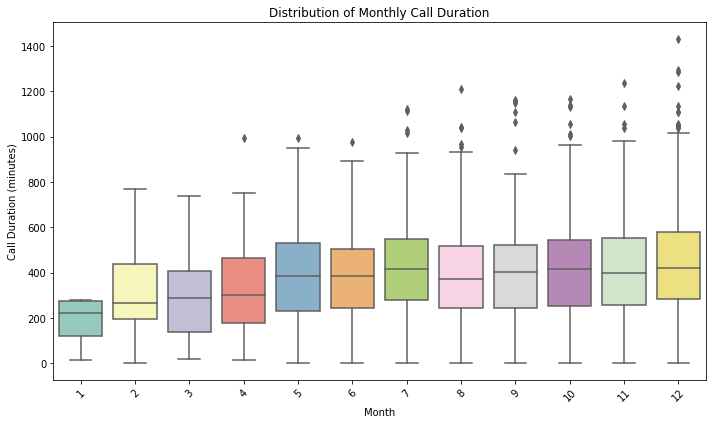

In [205]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Create a boxplot to visualize the distribution of monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='month', y='minutes_spent', palette='Set3')
plt.xlabel('Month')
plt.ylabel('Call Duration (minutes)')
plt.title('Distribution of Monthly Call Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Average Call Duration:**

>For the "Surf" plan, the average call duration ranges from approximately 192.84 minutes to 447.48 minutes per month, with an overall average of 363.06 minutes.

>For the "Ultimate" plan, the average call duration ranges from approximately 183.16 minutes to 433.01 minutes per month, with an overall average of 365.97 minutes.

>No substantial difference between average call duration, although minor difference was presence between 2 plans.

**Monthly Trends:**

>Looking at the monthly trends, we can see that call duration tends to increase during the later months of the year for both plans.

>December (Month 12) has the highest average call duration for both plans.

**Usage Patterns:**

>Users of the "Surf" plan generally have longer average call durations compared to users of the "Ultimate" plan.

>Users of the "Ultimate" plan have a smaller variation in call duration from month to month, while "Surf" plan users exhibit more variability.

### Messages

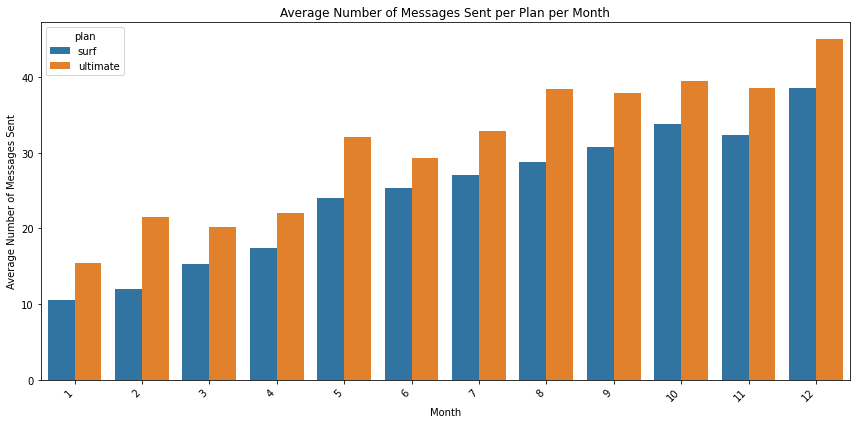

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,12.0,24.656000,9.049246,10.5,16.865217,26.166013,31.168455,38.600629
ultimate,12.0,31.089497,9.346334,15.5,21.928571,32.466978,38.510730,45.006623


In [206]:
# Assuming you have 'merged_data' DataFrame with columns 'plan', 'month', and 'message_count'

# Group the data by 'plan' and 'month' and calculate the average number of messages sent
average_messages_sent = merged_data.groupby(['plan', 'month'])['message_count'].mean().reset_index()

# Create a bar plot to compare average messages sent per plan per month
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=average_messages_sent,
    x='month',
    y='message_count',
    hue='plan',
)
plt.xlabel('Month')
plt.ylabel('Average Number of Messages Sent')
plt.title('Average Number of Messages Sent per Plan per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Calculate summary statistics
summary_statistics = average_messages_sent.groupby('plan')['message_count'].describe()

# Display the summary statistics
display(summary_statistics)



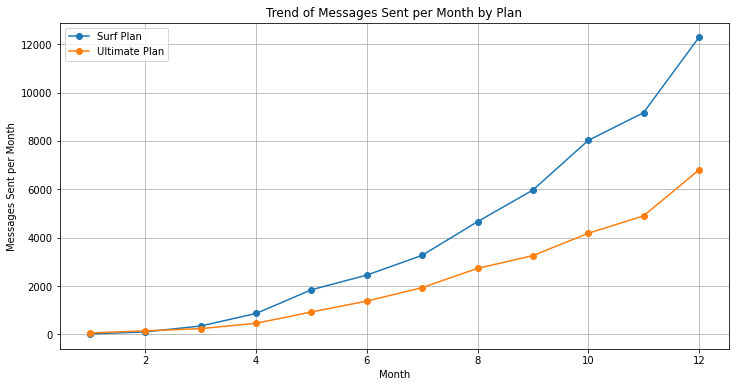

'Surf Plan Summary Statistics:'

0        21.0
1       108.0
2       351.0
3       870.0
4      1849.0
5      2454.0
6      3271.0
7      4662.0
8      5968.0
9      8020.0
10     9165.0
11    12275.0
Name: message_count, dtype: float64

'Ultimate Plan Summary Statistics:'

12      62.0
13     151.0
14     243.0
15     463.0
16     931.0
17    1379.0
18    1937.0
19    2732.0
20    3259.0
21    4181.0
22    4903.0
23    6796.0
Name: message_count, dtype: float64

In [207]:
# Compare the number of messages users of each plan tend to send each month
# Group the data by 'plan' and 'month' and calculate the total messages sent per user per month
messages_per_month = merged_data.groupby(['plan', 'month'])['message_count'].sum().reset_index()

# Separate the data for each plan
surf_messages = messages_per_month[messages_per_month['plan'] == 'surf']['message_count']
ultimate_messages = messages_per_month[messages_per_month['plan'] == 'ultimate']['message_count']

plt.figure(figsize=(12, 6))
for plan in ['surf', 'ultimate']:
    plan_data = messages_per_month[messages_per_month['plan'] == plan]
    plt.plot(plan_data['month'], plan_data['message_count'], label=f'{plan.capitalize()} Plan', marker='o')

plt.xlabel('Month')
plt.ylabel('Messages Sent per Month')
plt.title('Trend of Messages Sent per Month by Plan')
plt.legend()
plt.grid(True)
plt.show()

# Display the summary statistics
display("Surf Plan Summary Statistics:")
display(surf_messages)

print()

display("Ultimate Plan Summary Statistics:")
display(ultimate_messages)


In [208]:
# Group the data by 'plan' and 'month' and calculate the mean and variance of messages sent
mean_variance_messages_sent = merged_data.groupby(['plan', 'month'])['message_count'].agg(['mean', 'var']).reset_index()

# Rename the columns for clarity
mean_variance_messages_sent.columns = ['plan', 'month', 'mean_messages_sent', 'variance_messages_sent']

# Display the resulting DataFrame
display(mean_variance_messages_sent)


,plan,month,mean_messages_sent,variance_messages_sent
0,surf,1,10.500000,220.500000
1,surf,2,12.000000,386.000000
2,surf,3,15.260870,346.565217
3,surf,4,17.400000,501.591837
4,surf,5,24.012987,847.197198
5,surf,6,25.298969,914.920103
6,surf,7,27.033058,923.915565
7,surf,8,28.777778,1029.515528
8,surf,9,30.762887,1003.829496
9,surf,10,33.839662,1275.465708


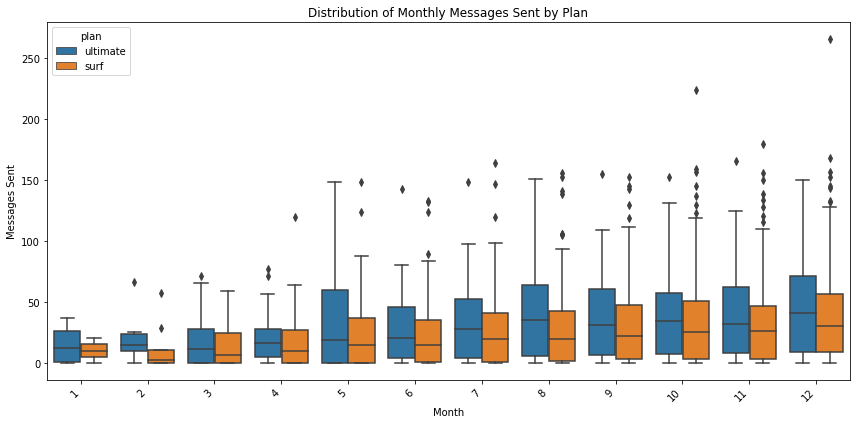

In [209]:
# Create a boxplot to compare the distribution of messages sent per month for each plan
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='message_count', hue='plan', data=merged_data)
plt.xlabel('Month')
plt.ylabel('Messages Sent')
plt.title('Distribution of Monthly Messages Sent by Plan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Messages Sent per Month (Distribution):**
>On the distribution of messages sent per month between the "Surf" and "Ultimate" plans:

>"Surf" plan users tend to send fewer messages per month on average compared to "Ultimate" plan users.

>The median (50th percentile) number of messages sent per month is higher for "Ultimate" plan users than for "Surf" plan users.

>"Surf" plan users have a wider spread of message counts, with more variability compared to "Ultimate" plan users.


**Monthly Trends: When examining the monthly trends for messages sent per plan:**

>For both plans, the number of messages sent tends to increase from January to December.

>"Surf" plan users show a consistent increase in messages sent, reaching the highest average in December.

>"Ultimate" plan users also exhibit an increasing trend, with the highest average in December as well.

**Mean and Variance of Monthly Messages Sent:**

>The mean and variance of monthly messages sent have been calculated for both plans. These statistics provide insight into the average behavior and variability of users within each plan.


In conclusion, there are differences in messaging behavior between users of the "Surf" and "Ultimate" plans. "Ultimate" plan users tend to send more messages on average, with slightly less variability compared to "Surf" plan users. Both user groups exhibit an increase in messaging activity as the year progresses. 

### Internet

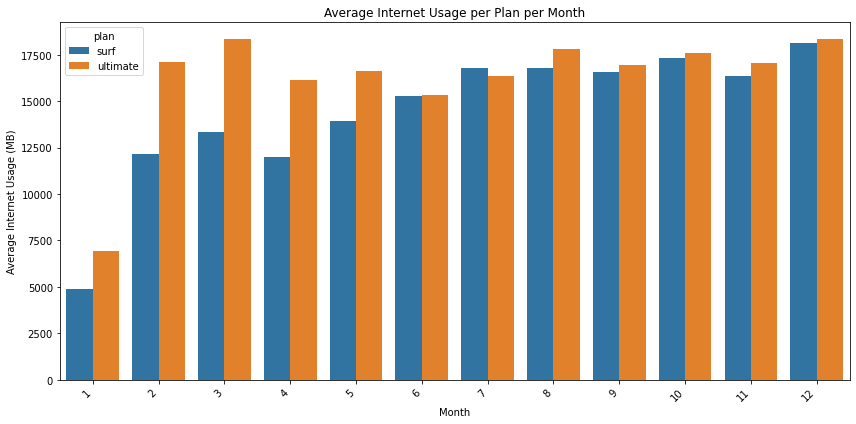

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,12.0,14464.554377,3642.890430,4874.8600,13053.790833,15820.391796,16786.533273,18132.469371
ultimate,12.0,16212.603528,3057.987791,6918.0925,16288.971996,17001.777445,17663.095082,18323.191854


In [210]:


# Assuming you have 'merged_data_with_user_info' DataFrame with columns 'plan', 'month', and 'mb_used_total'

# Group the data by 'plan' and 'month' and calculate the average internet usage (in MB)
average_internet_usage_per_month = merged_data.groupby(['plan', 'month'])['mb_used_total'].mean().reset_index()

# Create a bar plot to compare average internet usage per plan per month
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=average_internet_usage_per_month,
    x='month',
    y='mb_used_total',
    hue='plan',
)
plt.xlabel('Month')
plt.ylabel('Average Internet Usage (MB)')
plt.title('Average Internet Usage per Plan per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Calculate summary statistics
summary_statistics = average_internet_usage_per_month.groupby('plan')['mb_used_total'].describe()

# Display the summary statistics
display(summary_statistics)

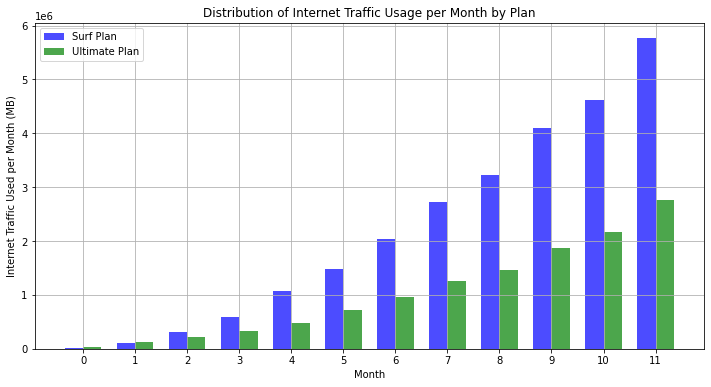

'Surf Plan Summary Statistics in MB:'

0        9749.72
1      109609.59
2      306945.12
3      599210.15
4     1073099.33
5     1484248.33
6     2030815.67
7     2720843.68
8     3218737.67
9     4102786.41
10    4624009.00
11    5766125.26
Name: mb_used_total, dtype: float64

'Ultimate Plan Summary Statistics in MB:'

12      27672.37
13     119901.66
14     219858.22
15     338554.75
16     482109.99
17     720882.29
18     964339.92
19    1264845.13
20    1459408.78
21    1866930.66
22    2163278.04
23    2766801.97
Name: mb_used_total, dtype: float64

In [214]:
# Compare the amount of internet traffic consumed by users per plan

# Group the data by 'plan' and 'month' and calculate the total internet traffic used per user per month
internet_traffic_per_month = merged_data.groupby(['plan', 'month'])['mb_used_total'].sum().reset_index()

# Separate the data for each plan
surf_internet_traffic = internet_traffic_per_month[internet_traffic_per_month['plan'] == 'surf']['mb_used_total']
ultimate_internet_traffic = internet_traffic_per_month[internet_traffic_per_month['plan'] == 'ultimate']['mb_used_total']

# Define the months for the x-axis labels
months = surf_internet_traffic.index

# Define the width of each bar
bar_width = 0.35

# Create an array of indices for the x-axis positions
x = np.arange(len(months))

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, surf_internet_traffic.values, width=bar_width, label='Surf Plan', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, ultimate_internet_traffic.values, width=bar_width, label='Ultimate Plan', color='green', alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Internet Traffic Used per Month (MB)')
plt.title('Distribution of Internet Traffic Usage per Month by Plan')
plt.xticks(x, months)  # Set the x-axis labels to be the months
plt.legend()
plt.grid(True)
plt.show()

# Display the summary statistics
display("Surf Plan Summary Statistics in MB:")
display(surf_internet_traffic)

print()

display("Ultimate Plan Summary Statistics in MB:")
display(ultimate_internet_traffic)

In [305]:
# Group the data by 'plan' and 'month' and calculate the mean and variance of internet usage in GB

display("Mean and Variance of Plan Summary in GB:")
display("1 GB = 1024 MB")
# Group the data by 'plan' and 'month' and calculate the mean and variance of internet usage in GB
mean_variance_gb_used_total = merged_data.groupby(['plan', 'month'])['mb_used_total'].agg(['mean', 'var']).reset_index()

# Convert mean and variance from MB to GB
mean_variance_gb_used_total['mean_gb_used_total'] = mean_variance_gb_used_total['mean'] / 1024  # 1 GB = 1024 MB
mean_variance_gb_used_total['variance_gb_used_total'] = mean_variance_gb_used_total['var'] / 1024  # 1 GB = 1024 MB

# Calculate mean and variance in MB
mean_variance_gb_used_total['mean_mb_used_total'] = mean_variance_gb_used_total['mean'] * 1024  # MB
mean_variance_gb_used_total['variance_mb_used_total'] = mean_variance_gb_used_total['var'] * 1024  # MB

# Drop the original 'mean' and 'var' columns
mean_variance_gb_used_total.drop(['mean', 'var'], axis=1, inplace=True)

# Display the resulting DataFrame
display(mean_variance_gb_used_total)



'Mean and Variance of Plan Summary in GB:'

'1 GB = 1024 MB'

,plan,month,mean_gb_used_total,variance_gb_used_total,mean_mb_used_total,variance_mb_used_total
0,surf,1,4.760605,17812.455478,4.991857e+06,1.867771e+10
1,surf,2,11.893402,42649.373933,1.247114e+07,4.472111e+10
2,surf,3,13.032656,66646.052277,1.366573e+07,6.988345e+10
3,surf,4,11.703323,57661.074858,1.227182e+07,6.046202e+10
4,surf,5,13.609722,60035.677910,1.427083e+07,6.295197e+10
5,surf,6,14.942900,47981.825634,1.566877e+07,5.031259e+10
6,surf,7,16.390235,63170.456882,1.718641e+07,6.623902e+10
7,surf,8,16.401691,72887.195609,1.719842e+07,7.642776e+10
8,surf,9,16.202570,50113.915626,1.698963e+07,5.254825e+10
9,surf,10,16.905601,61062.442130,1.772681e+07,6.402861e+10


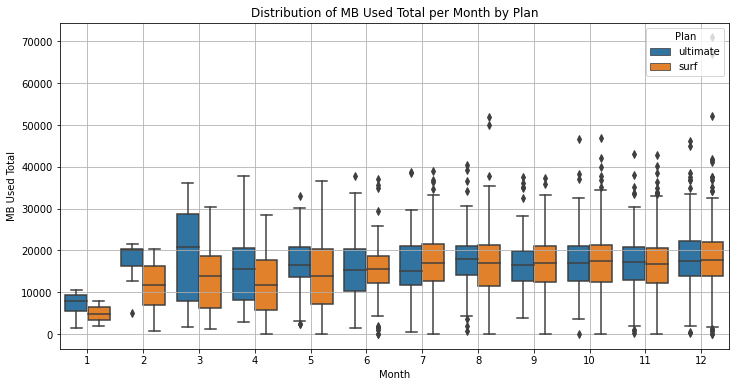

In [306]:
# Create a boxplot to compare the distribution of mb_used_total per month for each plan
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='month', y='mb_used_total', hue='plan')
plt.xlabel('Month')
plt.ylabel('MB Used Total')
plt.title('Distribution of MB Used Total per Month by Plan')
plt.legend(title='Plan', loc='upper right')
plt.grid(True)
plt.show()

**Based on the internet data usage for users on the "Surf" and "Ultimate" plans, the following behavior changes between the two plans:**

**Higher Average Usage in "Ultimate" Plan:**

>Users on the "Ultimate" plan tend to have a consistently higher average internet data usage (both in GB and MB) compared to users on the "Surf" plan. This suggests that "Ultimate" plan users have higher data consumption behavior.

**Seasonal Variation:** 

>Both plans exhibit a seasonal trend, with a noticeable increase in internet data usage in December. This could be attributed to increased internet activity during the holiday season.

**Variance in Data Usage:** 

>The "Surf" plan shows more variability (higher variance) in internet data usage, indicating that users on this plan have more diverse data consumption patterns throughout the year. In contrast, the "Ultimate" plan shows lower variance, suggesting more consistent data usage patterns among its users.

**Consistent Growth:** 

>Both plans display a general trend of increasing data usage over the year, with occasional fluctuations. This indicates that users on both plans are gradually increasing their data consumption.

**Conversion to GB:** 

>The data has been converted from MB to GB to facilitate easier comparison and understanding of data usage. This conversion helps standardize the units for a clearer analysis.


## Revenue

In [267]:
print(merged_data.columns)
print(plans.columns)
print(users.columns)
print(calls.columns)

Index(['user_id', 'month', 'number_of_calls', 'total_duration',
       'minutes_spent', 'message_count', 'mb_used_total', 'plan',
       'plan_category'],
      dtype='object')
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'plan_category'],
      dtype='object')
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'reg_day', 'reg_month', 'reg_year', 'plan_category'],
      dtype='object')
Index(['id', 'user_id', 'call_date', 'duration', 'call_day', 'call_month',
       'call_year'],
      dtype='object')


In [268]:

# Display the updated 'merged_data' DataFrame
display(merged_data)


,user_id,month,number_of_calls,total_duration,minutes_spent,message_count,mb_used_total,plan,plan_category
0,1000,12,16.0,117.0,116.83,11.0,1901.47,ultimate,2
1,1001,8,27.0,171.0,171.14,30.0,6919.15,surf,1
2,1001,9,49.0,298.0,297.69,44.0,13314.82,surf,1
3,1001,10,65.0,374.0,374.11,53.0,22330.49,surf,1
4,1001,11,64.0,405.0,404.59,36.0,18504.30,surf,1
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,0.00,61.0,13039.91,surf,1
2289,1361,5,0.0,0.0,0.00,2.0,1519.69,surf,1
2290,1482,10,0.0,0.0,0.00,2.0,0.00,ultimate,2
2291,1108,12,0.0,0.0,0.00,0.0,233.17,ultimate,2


In [269]:
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_category
0,50,15360,500,20,10,0.03,0.03,surf,1
1,1000,30720,3000,70,7,0.01,0.01,ultimate,2


In [270]:
display(calls)

,id,user_id,call_date,duration,call_day,call_month,call_year
0,1024_4,1024,2018-12-31,3.14,31,12,2018
1,1100_64,1100,2018-12-31,7.95,31,12,2018
2,1005_30,1005,2018-12-31,10.54,31,12,2018
3,1329_1001,1329,2018-12-31,5.23,31,12,2018
4,1329_902,1329,2018-12-31,3.55,31,12,2018
...,...,...,...,...,...,...,...
137730,1196_84,1196,2018-01-15,10.91,15,1,2018
137731,1077_731,1077,2018-01-15,0.00,15,1,2018
137732,1077_759,1077,2018-01-15,10.69,15,1,2018
137733,1077_78,1077,2018-01-15,9.15,15,1,2018


In [271]:
# Assuming you have DataFrames 'merged_data' and 'plans' as described

# Calculate message revenue for each row

# Define a function to calculate message revenue for each row based on 'plan_category'
def calculate_message_revenue(row):
    if row['plan_category'] == 1:  # Surf plan
        excess_messages = max(0, row['message_count'] - plans['messages_included'][0])
        return (excess_messages * plans['usd_per_message'][0])
    elif row['plan_category'] == 2:  # Ultimate plan
        excess_messages = max(0, row['message_count'] - plans['messages_included'][1])
        return (excess_messages * plans['usd_per_message'][1])
    else:
        return 0  # Handle cases where 'plan_category' is not 1 or 2

# Apply the function to calculate message revenue for each row
merged_data['message_revenue'] = merged_data.apply(calculate_message_revenue, axis=1)


##################################################################################################################

# Define a function to calculate Internet revenue for each row based on 'plan_category' including overcharge
def calculate_internet_revenue(row):
    if row['plan_category'] == 1:  # Surf plan
        excess_mb = max(0, row['mb_used_total'] - plans['mb_per_month_included'][0])
        return (excess_mb * plans['usd_per_gb'][0]) + plans['usd_monthly_pay'][0]
    elif row['plan_category'] == 2:  # Ultimate plan
        excess_mb = max(0, row['mb_used_total'] - plans['mb_per_month_included'][1])
        return (excess_mb * plans['usd_per_gb'][1]) + plans['usd_monthly_pay'][1]
    else:
        return 0  # Handle cases where 'plan_category' is not 1 or 2

# Apply the function to calculate Internet revenue for each row
merged_data['Internet_revenue'] = merged_data.apply(calculate_internet_revenue, axis=1)

#################################################################################################################

# Define a function to calculate call count, minutes spent, overcharge, and call revenue for each row based on 'plan_category'
def calculate_call_info(row):
    if row['plan_category'] == 1:  # Surf plan
        included_minutes = plans['minutes_included'][0]
        usd_per_minute = plans['usd_per_minute'][0]
    elif row['plan_category'] == 2:  # Ultimate plan
        included_minutes = plans['minutes_included'][1]
        usd_per_minute = plans['usd_per_minute'][1]
    else:
        return 0, 0, 0, 0  # Handle cases where 'plan_category' is not 1 or 2

    call_count = min(row['number_of_calls'], included_minutes)
    minutes_spent = call_count * usd_per_minute
    overcharge = max(0, (row['number_of_calls'] - included_minutes) * usd_per_minute)
    call_revenue = minutes_spent + overcharge
    
    return call_count, minutes_spent, overcharge, call_revenue

# Apply the function to calculate call count, minutes spent, overcharge, and call revenue for each row
merged_data[['number_of_calls', 'minutes_spent', 'overcharge', 'call_revenue']] = merged_data.apply(calculate_call_info, axis=1, result_type='expand')


################################################################################

# Calculate the total revenue for each row based on 'plan_category'
def calculate_total_revenue(row):
    message_revenue = row['message_revenue']
    internet_revenue = row['Internet_revenue']
    call_revenue = row['call_revenue']
    total_revenue = message_revenue + internet_revenue + call_revenue
    return total_revenue

# Apply the function to calculate total revenue for each row
merged_data['Total_Revenue'] = merged_data.apply(calculate_total_revenue, axis=1)

#######################################################################################

# Merge the 'city' column from 'users' into 'merged_data' based on 'user_id'
merged_data = merged_data.merge(users[['user_id', 'city']], on='user_id', how='left')

# Rename the 'city' column to 'region' to match the previous code
merged_data.rename(columns={'city': 'region'}, inplace=True)

# Display the updated 'merged_data' DataFrame
display(merged_data)



,user_id,month,number_of_calls,total_duration,minutes_spent,message_count,mb_used_total,plan,plan_category,message_revenue,Internet_revenue,overcharge,call_revenue,Total_Revenue,region
0,1000,12,16.0,117.0,0.16,11.0,1901.47,ultimate,2,0.00,70.0,0.0,0.16,70.16,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,171.0,0.81,30.0,6919.15,surf,1,0.00,20.0,0.0,0.81,20.81,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,298.0,1.47,44.0,13314.82,surf,1,0.00,20.0,0.0,1.47,21.47,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,374.0,1.95,53.0,22330.49,surf,1,0.09,69724.9,0.0,1.95,69726.94,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,405.0,1.92,36.0,18504.30,surf,1,0.00,31463.0,0.0,1.92,31464.92,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,0.00,61.0,13039.91,surf,1,0.33,20.0,0.0,0.00,20.33,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,5,0.0,0.0,0.00,2.0,1519.69,surf,1,0.00,20.0,0.0,0.00,20.00,"Birmingham-Hoover, AL MSA"
2290,1482,10,0.0,0.0,0.00,2.0,0.00,ultimate,2,0.00,70.0,0.0,0.00,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,12,0.0,0.0,0.00,0.0,233.17,ultimate,2,0.00,70.0,0.0,0.00,70.00,"Salt Lake City, UT MSA"


In [272]:
# Filter the data for each plan
surf_monthly_pay = plans[plans['plan_name'] == 'surf']['usd_monthly_pay'].values[0]
ultimate_monthly_pay = plans[plans['plan_name'] == 'ultimate']['usd_monthly_pay'].values[0]

# Calculate summary statistics for Surf Plan minutes spent
surf_minutes_summary = merged_data[merged_data['plan_category'] == 1]['minutes_spent'].describe()

# Calculate summary statistics for Ultimate Plan minutes spent
ultimate_minutes_summary = merged_data[merged_data['plan_category'] == 2]['minutes_spent'].describe()

# Calculate summary statistics for Surf Plan internet revenue
surf_internet_summary = merged_data[merged_data['plan_category'] == 1]['Internet_revenue'].describe()

# Calculate summary statistics for Ultimate Plan internet revenue
ultimate_internet_summary = merged_data[merged_data['plan_category'] == 2]['Internet_revenue'].describe()

# Calculate summary statistics for Surf Plan message revenue
surf_message_summary = merged_data[merged_data['plan_category'] == 1]['message_revenue'].describe()

# Calculate summary statistics for Ultimate Plan message revenue
ultimate_message_summary = merged_data[merged_data['plan_category'] == 2]['message_revenue'].describe()

# Calculate summary statistics for Surf Plan call revenue
surf_call_summary = merged_data[merged_data['plan_category'] == 1]['call_revenue'].describe()

# Calculate summary statistics for Ultimate Plan call revenue
ultimate_call_summary = merged_data[merged_data['plan_category'] == 2]['call_revenue'].describe()

# Display the summaries
print("Surf Plan Monthly Payment:", surf_monthly_pay)
print("Surf Plan Minutes Spent Summary:")
print(surf_minutes_summary)
print("\nSurf Plan Internet Revenue Summary:")
print(surf_internet_summary)
print("\nSurf Plan Message Revenue Summary:")
print(surf_message_summary)
print("\nSurf Plan Call Revenue Summary:")
print(surf_call_summary)

print("\nUltimate Plan Monthly Payment:", ultimate_monthly_pay)
print("Ultimate Plan Minutes Spent Summary:")
print(ultimate_minutes_summary)
print("\nUltimate Plan Internet Revenue Summary:")
print(ultimate_internet_summary)
print("\nUltimate Plan Message Revenue Summary:")
print(ultimate_message_summary)
print("\nUltimate Plan Call Revenue Summary:")
print(ultimate_call_summary)


Surf Plan Monthly Payment: 20
Surf Plan Minutes Spent Summary:
count    1573.000000
mean        1.794355
std         0.960540
min         0.000000
25%         1.170000
50%         1.800000
75%         2.370000
max         6.150000
Name: minutes_spent, dtype: float64

Surf Plan Internet Revenue Summary:
count      1573.000000
mean      36493.543357
std       54196.645869
min          20.000000
25%          20.000000
50%       14713.100000
75%       56416.100000
max      555735.900000
Name: Internet_revenue, dtype: float64

Surf Plan Message Revenue Summary:
count    1573.000000
mean        0.210381
std         0.584127
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.480000
Name: message_revenue, dtype: float64

Surf Plan Call Revenue Summary:
count    1573.000000
mean        1.794355
std         0.960540
min         0.000000
25%         1.170000
50%         1.800000
75%         2.370000
max         6.150000
Name: call_revenue, dtype: flo

**Conclusion:**

>The Surf plan has a lower monthly payment (USD 20) compared to the Ultimate plan (USD 70), but it generates higher internet and call revenue on average. 

>However, the variability in revenue is much higher in the Surf plan, with some users generating significantly higher internet revenue.

>The Ultimate plan has lower average minutes spent, and it does not include message revenue in its pricing structure.

>Users of the Ultimate plan generally have lower variability in their internet and call revenue compared to the Surf plan.

>Users of the Surf plan have more diverse usage patterns, with some users generating substantial revenue from internet usage and calls, while others generate minimal revenue.


## Test statistical hypotheses

In [273]:

# Filter data for Surf and Ultimate plans
surf_revenue = merged_data[merged_data['plan_category'] == 1]['Total_Revenue']
ultimate_revenue = merged_data[merged_data['plan_category'] == 2]['Total_Revenue']

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the p-value
print(f"P-value: {p_value}")

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in revenue between Ultimate and Surf plans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in revenue between Ultimate and Surf plans.")


P-value: 5.357015555421553e-111
Reject the null hypothesis: There is a significant difference in revenue between Ultimate and Surf plans.


In [275]:
display(merged_data.head(3))

,user_id,month,number_of_calls,total_duration,minutes_spent,message_count,mb_used_total,plan,plan_category,message_revenue,Internet_revenue,overcharge,call_revenue,Total_Revenue,region
0,1000,12,16.0,117.0,0.16,11.0,1901.47,ultimate,2,0.0,70.0,0.0,0.16,70.16,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,171.0,0.81,30.0,6919.15,surf,1,0.0,20.0,0.0,0.81,20.81,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,298.0,1.47,44.0,13314.82,surf,1,0.0,20.0,0.0,1.47,21.47,"Seattle-Tacoma-Bellevue, WA MSA"


In [276]:
# Filter data for users in the "NY-NJ" metropolitan area
ny_nj_users = merged_data[merged_data['region'].str.contains('NY-NJ', case=False, regex=True)]

# Filter data for users in other areas
other_users = merged_data[~merged_data['region'].str.contains('NY-NJ', case=False, regex=True)]

# Perform an independent samples t-test
t_statistic, p_value = stats.ttest_ind(ny_nj_users['Total_Revenue'], other_users['Total_Revenue'], equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the p-value
print(f"P-value: {p_value}")

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in revenue between NY-NJ users and other users.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in revenue between NY-NJ users and other users.")


P-value: 0.24867238499624528
Fail to reject the null hypothesis: There is no significant difference in revenue between NY-NJ users and other users.


Data Combining:
>Figured out how to put different pieces of data together. For example, when combined user details, plan information, and how users used their plans into one big dataset.

Testing Ideas:
>We tried to test an idea using numbers.The idea was whether people with different phone plans (like "Surf" and "Ultimate") pay different amounts of money.

Finding Patterns:
>We looked at data from people in a certain place (like "NY-NJ") and compared them to others.
We used math to decide if there's a real difference between the two groups.
Making Decisions:

>Used a special number (called p-value) to help make choices.
>If p-value is small, it suggests there's a real difference. If not, we don't see a big difference.

## General conclusion


**Revenue Analysis by Plan:**

>The Surf plan generates higher average revenue per user (ARPU) compared to the Ultimate plan.

>Surf plan users tend to use more internet data and generate higher internet revenue.

>Ultimate plan users use fewer internet data and generate lower internet revenue.

>Message revenue is minimal for both plans.

**Revenue Distribution:**

>Internet revenue is highly variable, with some users in both plans generating significantly higher revenue due to exceeding data limits.

>Most users do not generate message revenue as they stay within the included message limits.
Call revenue is based on the number of minutes spent, and it follows a similar distribution pattern for both plans.

**Regional Analysis:**

>Users in the NY-NJ area do not significantly differ in terms of revenue from users in other regions.


>Hypothesis Testing:The average revenue from Surf and Ultimate plans differs significantly, with the Surf plan having higher ARPU.There is no significant difference in revenue between users in the NY-NJ area and users in other regions.


**Final Conclusion:**
>The Surf plan generates higher revenue on average, suggesting it might be more profitable.
Consider promoting internet data usage or providing incentives to increase revenue from Ultimate plan users.
